In [5]:
from PIL import Image
import numpy as np
img = Image.open('bird.png')
img.show()

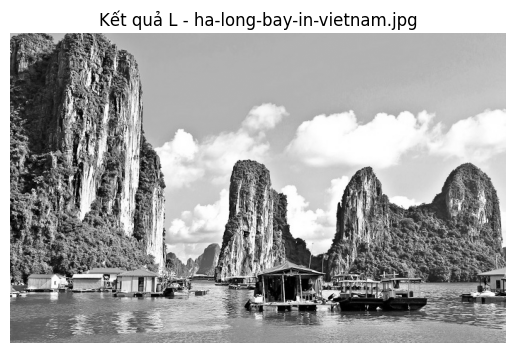

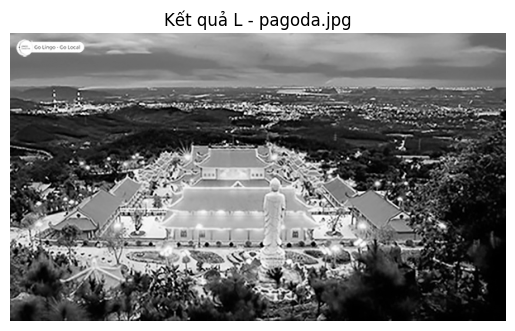

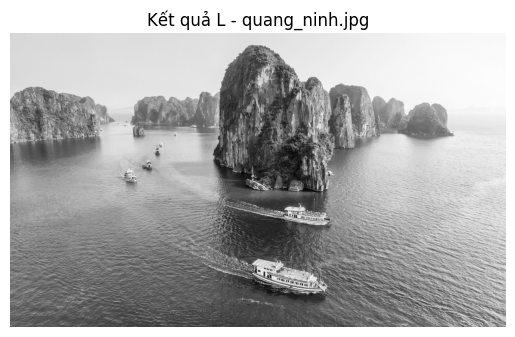

Xử lý hoàn tất.


In [6]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import os
import cv2

input_dir = "exercise"
output_dir = "output1"
os.makedirs(output_dir, exist_ok=True)

def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_norm = img / 255.0
    gamma_corrected = np.power(img_norm, gamma)
    return np.uint8(gamma_corrected * 255)

def log_transform(img):
    img_norm = img / 255.0
    log_img = np.log1p(img_norm) / np.log(2)
    return np.uint8(log_img * 255)

def histogram_equalization(img):
    if len(img.shape) == 2:
        return cv2.equalizeHist(img)
    else:
        ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
        ycrcb[:, :, 0] = cv2.equalizeHist(ycrcb[:, :, 0])
        return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

def contrast_stretching(img):
    p2, p98 = np.percentile(img, (2, 98))
    return np.uint8(np.clip((img - p2) * 255 / (p98 - p2), 0, 255))
key_map = {
    'I': image_inverse,
    'G': gamma_correction,
    'L': log_transform,
    'H': histogram_equalization,
    'C': contrast_stretching
}
key = input("Nhập phím (I, G, L, H, C): ").upper()
if key in key_map:
    func = key_map[key]
    for filename in os.listdir(input_dir):
        path = os.path.join(input_dir, filename)
        img = cv2.imread(path)
        if img is None:
            print(f"Lỗi đọc ảnh: {filename}")
            continue
        if key in ['I', 'G', 'L', 'C']:
            img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            result = func(img_gray)
        else:
            result = func(img)
        output_path = os.path.join(output_dir, f"{key}_{filename}")
        cv2.imwrite(output_path, result)
        if len(result.shape) == 2:
            plt.imshow(result, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title(f"Kết quả {key} - {filename}")
        plt.axis('off')
        plt.show()

    print("Xử lý hoàn tất.")
else:
    print("Phím không hợp lệ. Vui lòng nhập I, G, L, H hoặc C.")


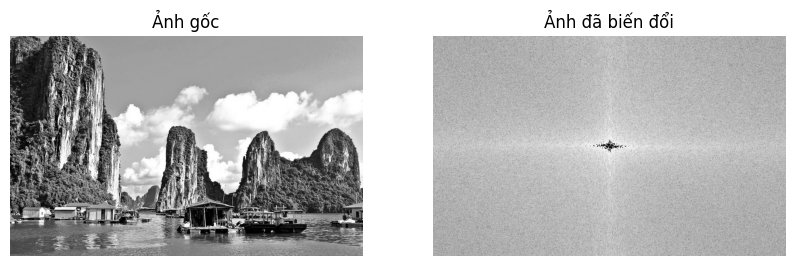

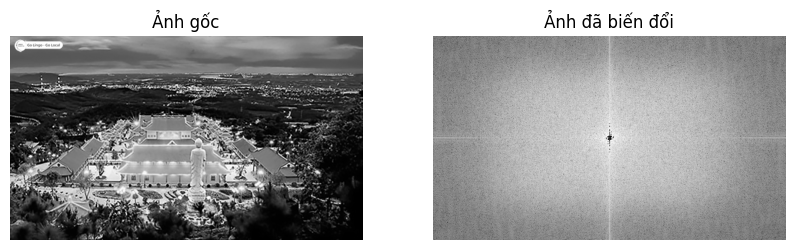

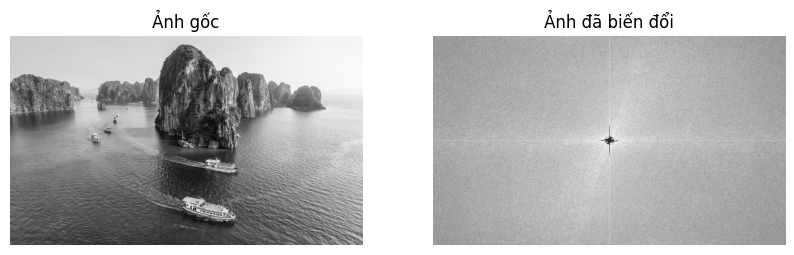

Xử lý hoàn tất.


In [7]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

input_dir = "exercise"
output_dir = "output2"
os.makedirs(output_dir, exist_ok=True)
def fast_fourier(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return np.uint8(magnitude_spectrum)

def butterworth_filter(shape, cutoff, order, highpass=False):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    u = np.arange(rows) - crow
    v = np.arange(cols) - ccol
    U, V = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    if highpass:
        H = 1 / (1 + (cutoff / (D + 1e-5))**(2 * order))  
    else:
        H = 1 / (1 + (D / (cutoff + 1e-5))**(2 * order))  
    return H

def apply_butterworth(img, cutoff, order, highpass=False):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    H = butterworth_filter(img.shape, cutoff, order, highpass)
    filtered = fshift * H
    f_ishift = np.fft.ifftshift(filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return np.uint8(np.clip(img_back, 0, 255))

key_map = {
    'F': fast_fourier,
    'L': lambda img: apply_butterworth(img, cutoff=30, order=2, highpass=False),
    'H': lambda img: apply_butterworth(img, cutoff=30, order=2, highpass=True)
}

key = input("Nhập phím (F: FFT, L: Lowpass, H: Highpass): ").upper()

if key in key_map:
    func = key_map[key]
    for filename in os.listdir(input_dir):
        path = os.path.join(input_dir, filename)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Không đọc được ảnh: {filename}")
            continue

        result = func(img)

        output_path = os.path.join(output_dir, f"{key}_{filename}")
        cv2.imwrite(output_path, result)

        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Ảnh gốc")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(result, cmap='gray')
        plt.title("Ảnh đã biến đổi")
        plt.axis('off')
        plt.show()

    print("Xử lý hoàn tất.")
else:
    print("Phím không hợp lệ. Chọn F, L hoặc H.")


✅ Đã xử lý: ha-long-bay-in-vietnam.jpg → Câu 3 - gamma_correction


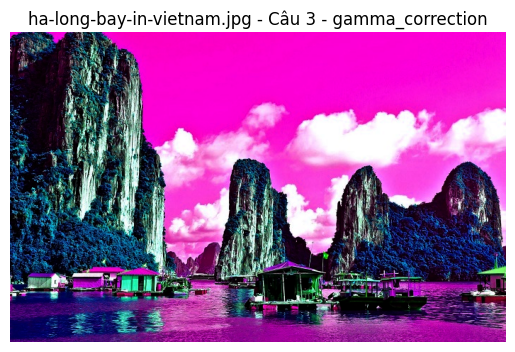

✅ Đã xử lý: pagoda.jpg → Câu 4 - Lowpass + Min Filter


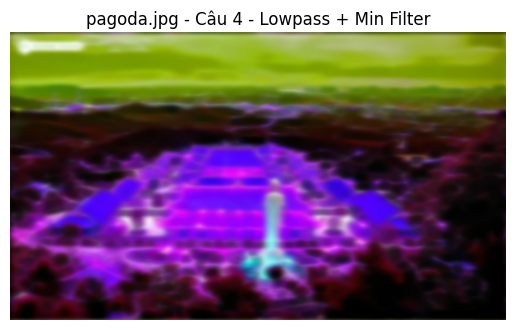

✅ Đã xử lý: quang_ninh.jpg → Câu 4 - Highpass + Max Filter


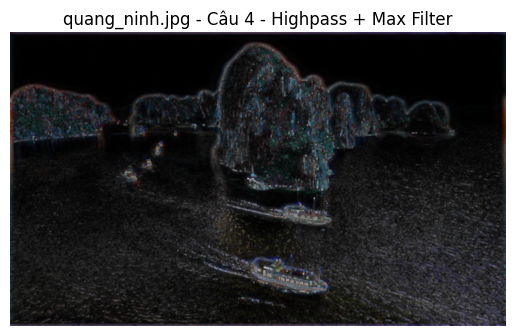

🎉 Hoàn tất. Kiểm tra thư mục output/cau3 và output/cau4.


In [8]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

# ==== Thiết lập thư mục ====
input_dir = "exercise"
output_dir = "output"
output_dir_cau3 = os.path.join(output_dir, "cau3")
output_dir_cau4 = os.path.join(output_dir, "cau4")
os.makedirs(output_dir_cau3, exist_ok=True)
os.makedirs(output_dir_cau4, exist_ok=True)

# ==== Hàm hỗ trợ xử lý ảnh ====
def random_rgb_swap(img):
    channels = [0, 1, 2]
    random.shuffle(channels)
    return img[:, :, channels]

def negative(img):
    return 255 - img

def log_transform(img):
    img = np.float32(img)
    c = 255 / np.log(1 + np.max(img))
    return np.uint8(c * np.log(1 + img))

def gamma_correction(img, gamma=1.5):
    img = np.float32(img) / 255.0
    img = np.power(img, gamma)
    return np.uint8(img * 255)

def butterworth_filter(img, d0=30, n=2, highpass=False):
    rows, cols = img.shape[:2]
    u = np.arange(rows) - rows // 2
    v = np.arange(cols) - cols // 2
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)

    if highpass:
        H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n))
    else:
        H = 1 / (1 + (D / d0)**(2 * n))

    out = []
    for i in range(3):
        F = fftshift(fft2(img[:, :, i]))
        G = H * F
        g = np.abs(ifft2(ifftshift(G)))
        out.append(np.uint8(np.clip(g, 0, 255)))

    return cv2.merge(out)

def min_filter(img, ksize=3):
    return cv2.erode(img, np.ones((ksize, ksize), np.uint8))

def max_filter(img, ksize=3):
    return cv2.dilate(img, np.ones((ksize, ksize), np.uint8))

def apply_random_transform_v1(img):
    transforms = [negative, log_transform, gamma_correction]
    chosen = random.choice(transforms)
    return chosen(img), f"Câu 3 - {chosen.__name__}"

def apply_random_transform_v2(img):
    highpass = random.choice([True, False])
    filtered = butterworth_filter(img, highpass=highpass)
    if highpass:
        filtered = max_filter(filtered)
        desc = "Câu 4 - Highpass + Max Filter"
    else:
        filtered = min_filter(filtered)
        desc = "Câu 4 - Lowpass + Min Filter"
    return filtered, desc

# ==== Hàm hiển thị ảnh (dùng matplotlib) ====
def show_image(img, title):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

# ==== Xử lý ảnh trong thư mục ====
for filename in os.listdir(input_dir):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        path = os.path.join(input_dir, filename)
        img = cv2.imread(path)

        # Bước 1: Đổi RGB ngẫu nhiên
        img_swapped = random_rgb_swap(img)

        # Bước 2: Áp dụng câu 3 hoặc câu 4
        mode = random.choice(["v1", "v2"])
        if mode == "v1":
            result, desc = apply_random_transform_v1(img_swapped)
            save_path = os.path.join(output_dir_cau3, filename)
        else:
            result, desc = apply_random_transform_v2(img_swapped)
            save_path = os.path.join(output_dir_cau4, filename)

        # Bước 3: Hiển thị và lưu
        print(f"✅ Đã xử lý: {filename} → {desc}")
        show_image(result, f"{filename} - {desc}")
        cv2.imwrite(save_path, result)

print("🎉 Hoàn tất. Kiểm tra thư mục output/cau3 và output/cau4.")

